<a href="https://colab.research.google.com/github/erlanig/machine-learning/blob/main/Evaluation%20Algorithm_Iris%20and%20Mammographic%20Mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Algorithm

# **Nomor 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
names = ['sepal-length', 'sepal-width', 'petallength', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [4]:
# Split-out validation dataset
array = dataset.values

X = array[:,0:4]

Y = array[:,4]

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [6]:
# Spot Check Algorithms
models = []
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('BC', BaggingClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

SGD: 0.841667 (0.146487)
DT: 0.983333 (0.033333)
BC: 0.975000 (0.038188)


In [7]:
#  Decision Tree (DT)

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)
accuracy = accuracy_score(Y_validation, predictions)

print("Accuracy: ", accuracy)
print("\nConfusion Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy:  0.8666666666666667

Confusion Matrix: 
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



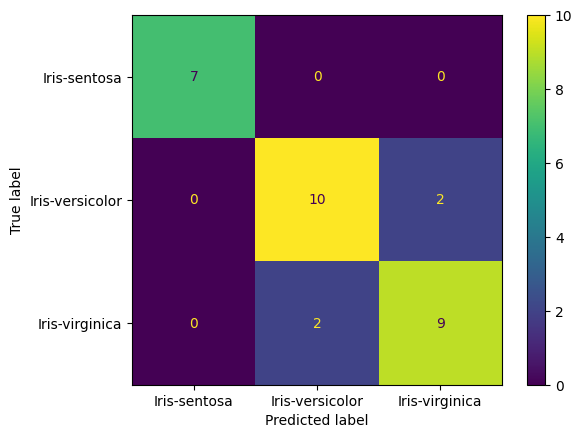

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_validation, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Iris-sentosa", "Iris-versicolor", "Iris-virginica"])
cm_display.plot()
plt.show()

# **Nomor 2**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
file_path = '/content/drive/MyDrive/DATASET/Mammographic_Mass.csv'

name = ['BI-RADS','Age','Shape','Margin','Density','Severity']

dataset = pd.read_csv(file_path, names=name)

In [12]:
array = dataset.values

X = array[:,0:5]

Y = array[:,5]

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
# Test options and evaluation metric

seed = 7
scoring = 'acuracy'

In [14]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  # Correct the scoring parameter to 'accuracy'
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.819426 (0.044561)
NB: 0.819426 (0.047566)
SVM: 0.783220 (0.026393)


In [15]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
accuracy = accuracy_score(Y_validation, predictions)

print("Accuracy: ", accuracy)
print("\nConfusion Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy:  0.7469879518072289

Confusion Matrix: 
[[63 20]
 [22 61]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        83
           1       0.75      0.73      0.74        83

    accuracy                           0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166



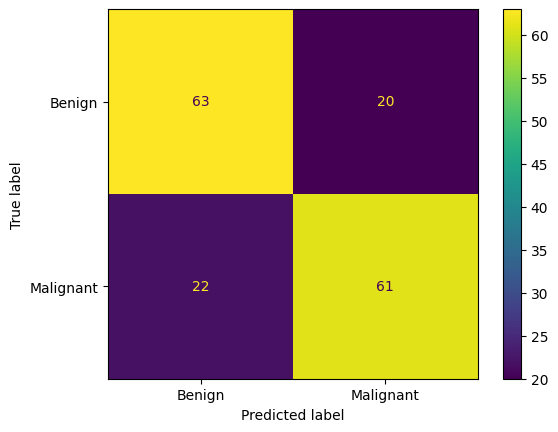

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_validation, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
cm_display.plot()
plt.show()